Some of this initial exploration was started by 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Start by examining datasets and understanding how the data is split up between the three datasets provided.

In [3]:
tile_meta = pd.read_csv("vasculature_data\\tile_meta.csv")
tile_meta.head(10)

id  source_wsi  dataset      i      j
0  0006ff2aa7cd           2        2  16896  16420
1  000e79e206b7           6        3  10240  29184
2  00168d1b7522           2        2  14848  14884
3  00176a88fdb0           7        3  14848  25088
4  0033bbc76b6b           1        1  10240  43008
5  003504460b3a           3        2   8192  11776
6  00359ab8338b           8        3   6656   9216
7  00488ca285ee           9        3   8192  37888
8  004daf1cbe75           3        2   6144  11264
9  004fb033dd09           7        3  20480  31232

In [4]:
tile_meta_dataset = {dataset: info for dataset, info in tile_meta.groupby('dataset')}
tile_meta_dataset

{1:                 id  source_wsi  dataset      i      j
 4     0033bbc76b6b           1        1  10240  43008
 16    00656c6f2690           1        1  10240  46080
 17    0067d5ad2250           2        1  23552  22528
 33    00d75ad65de3           1        1   8192  39424
 34    00da70813521           1        1  10240  46592
 ...            ...         ...      ...    ...    ...
 6844  f86347534ec1           2        1  16896  20992
 6895  faba1bf818ae           1        1   3072  39424
 6933  fc6def641612           1        1   7680  40960
 6951  fd2437954fd8           1        1   5120  39424
 6990  fe248458ea89           1        1  10240  44032
 
 [422 rows x 5 columns],
 2:                 id  source_wsi  dataset      i      j
 0     0006ff2aa7cd           2        2  16896  16420
 2     00168d1b7522           2        2  14848  14884
 5     003504460b3a           3        2   8192  11776
 8     004daf1cbe75           3        2   6144  11264
 11    005715f0a313           3 

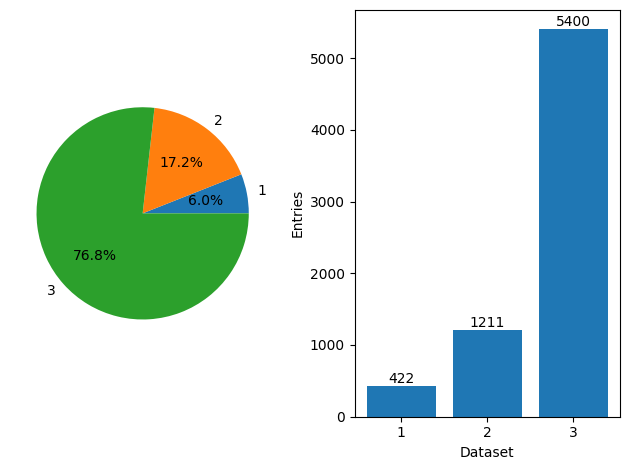

In [39]:
x = [(i[0]) for i in tile_meta_dataset.items()]
y = [len(i[1]) for i in tile_meta_dataset.items()]

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2)
barchart = ax1.bar(x, height=y)
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Entries')
ax1.set_xticks(range(1,4))
ax1.bar_label(barchart)

piechart = ax.pie(y, labels=x, autopct='%1.1f%%')
fig.tight_layout()
plt.show()

There are 7033 data points.
Dataset 1 (expert annotations): 422
Dataset 2 (annotated but not expert confirmed): 1211
Dataset 3 (unannotated): 5400

In [6]:
# Separate the dataset which contain expert annotations only
tile_meta_datasetOne = tile_meta_dataset[1]
tile_meta_datasetOne


id  source_wsi  dataset      i      j
4     0033bbc76b6b           1        1  10240  43008
16    00656c6f2690           1        1  10240  46080
17    0067d5ad2250           2        1  23552  22528
33    00d75ad65de3           1        1   8192  39424
34    00da70813521           1        1  10240  46592
...            ...         ...      ...    ...    ...
6844  f86347534ec1           2        1  16896  20992
6895  faba1bf818ae           1        1   3072  39424
6933  fc6def641612           1        1   7680  40960
6951  fd2437954fd8           1        1   5120  39424
6990  fe248458ea89           1        1  10240  44032

[422 rows x 5 columns]

In [7]:
# Dataframe containg both annotated datasets
tile_meta_annotated_dataset = pd.concat([tile_meta_dataset[1], tile_meta_dataset[2]]) 
tile_meta_annotated_dataset

id  source_wsi  dataset      i      j
4     0033bbc76b6b           1        1  10240  43008
16    00656c6f2690           1        1  10240  46080
17    0067d5ad2250           2        1  23552  22528
33    00d75ad65de3           1        1   8192  39424
34    00da70813521           1        1  10240  46592
...            ...         ...      ...    ...    ...
7016  ff434af74304           4        2   3072  22528
7017  ff4897b3eda6           4        2  11776  20992
7021  ff66dec71c4c           3        2   5120  10752
7025  ff99cdef0f2a           4        2   5120  24064
7029  ffd3d193c71e           3        2   7680  16896

[1633 rows x 5 columns]

Next lets look at the JSONL map which gives the polygonal boundary associated with the features blood vessels and glomerulus

In [8]:
polygon_map = pd.read_json("vasculature_data/polygons.jsonl", lines=True).explode('annotations')
polygon_map['type'] = ""
polygon_map['coordinates'] = ""
polygon_map['type'] = polygon_map.apply(
    lambda x: x['annotations']['type'], axis=1
)
polygon_map['coordinates'] = polygon_map.apply(
    lambda x: x['annotations']['coordinates'], axis=1
)
polygon_map.drop(columns='annotations', axis=1)


id          type   
0     0006ff2aa7cd    glomerulus  \
0     0006ff2aa7cd  blood_vessel   
0     0006ff2aa7cd  blood_vessel   
0     0006ff2aa7cd  blood_vessel   
0     0006ff2aa7cd  blood_vessel   
...            ...           ...   
1632  ffd3d193c71e  blood_vessel   
1632  ffd3d193c71e  blood_vessel   
1632  ffd3d193c71e  blood_vessel   
1632  ffd3d193c71e  blood_vessel   
1632  ffd3d193c71e  blood_vessel   

                                            coordinates  
0     [[[167, 249], [166, 249], [165, 249], [164, 24...  
0     [[[283, 109], [282, 109], [281, 109], [280, 10...  
0     [[[104, 292], [103, 292], [102, 292], [101, 29...  
0     [[[505, 442], [504, 442], [503, 442], [502, 44...  
0     [[[375, 477], [374, 477], [373, 477], [372, 47...  
...                                                 ...  
1632  [[[184, 308], [183, 308], [182, 308], [181, 30...  
1632  [[[42, 92], [41, 92], [40, 92], [39, 92], [38,...  
1632  [[[287, 480], [286, 480], [285, 480], [284, 48...  
1632  [[[493, 388], [492, 388], [491, 388], [490, 38...  
1632  [[[64, 15], [63, 15], [62, 15], [61, 15], [61,...  

[17518 rows x 3 columns]